Итак, мы имеем дело со следующей оценкой дисперсии:
$$\hat{\sigma}_n^2 = \frac{1}{2n} \sum_{i=1}^n (x_{[2i]} - x_{[2i-1]})^2$$

На самом деле, тут, даже особо не думая, можно сказать, что данная оценка будет плохой, так как давайте рассмотрим следующую ситуацию. Будем, например, брать выборки из непрерывного равномерного распределения на отрезке $[0;1]$, увеличивая их размер. Можно представить, что полученные точки выборки будут всё плотнее заполнять отрезок $[0;1]$. Следовательно, если мы будем составлять из них вариационный ряд, то разница между его соседними значениями будет стремиться к нулю при росте выборки. Следовательно, каждое отдельное слагаемое в формуле оценке дисперсии будет очень быстро убывать с ростом выборки. А мы к тому же ещё и будем делить всё на размер выборки $n$. В итоге, можно предположить, что наша оценка просто будет стремиться к нулю при $n \rightarrow \infty$. Однако сама дисперсия равномерного распределения на отрезке $[0;1]$, конечно, нулю не равна.
Собственно говоря, именно это мы и увидим в моделировании.

Для моделирования будем генерировать выборки различного объёма $n$ из нормального распределения $N(0, 9)$ - при каждом объёме выборки будем генерировать $M$ выборок одинаковой длины, вычислять математическое ожидание оценки при данном $n$ (которое нужно для проверки смещённости), а также вероятность отклонения оценки от истинной дисперсии на величину, превосходящую $\varepsilon$ (это необходимо для проверки несостоятельности).

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp

In [40]:
N = 1000  # максимальный размер выборки
M = 100  # параметр, задающий количество генерируемых выборок одинаковой длины n
mu = 0.0  # математическое ожидание
sigma = 3.0  # среднеквадратическое отклонение
sigma_sq = sigma ** 2  # дисперсия
eps = 0.1  # epsilon из сходимости по вероятности

In [45]:
P_sigma_bad = np.array([])
sigma_sq_expects_bad = np.array([])  # массив, который будет хранить математические ожидания оценок дисперсии при различных размерах выборки
for n in range(1, N, 10):  # цикл по размеру выборки
    sigma_sq_eval_list_bad = np.array([])  # массив оценок дисперсии при данном размере выборки
    for i in range(M):
        gauss = np.random.normal(mu, sigma, size=2*n)  # генерация выборки из нормального распределения с заданными параметрами
        gauss_sorted = np.sort(gauss)  # составление вариационного ряда
        sigma_sq_eval_list_bad = np.append(sigma_sq_eval_list_bad, np.sum((gauss_sorted[1::2] - gauss_sorted[::2]) ** 2) / (2 * n))  # оценка дисперсии
    sigma_sq_expects_bad = np.append(sigma_sq_expects_bad, np.mean(sigma_sq_eval_list_bad))  # вычисление мат. ожидания оценки дисперсии
    P_sigma_bad = np.append(P_sigma_bad, len(sigma_sq_eval_list_bad[np.abs(sigma_sq_eval_list_bad - sigma_sq) >= eps]) / M)

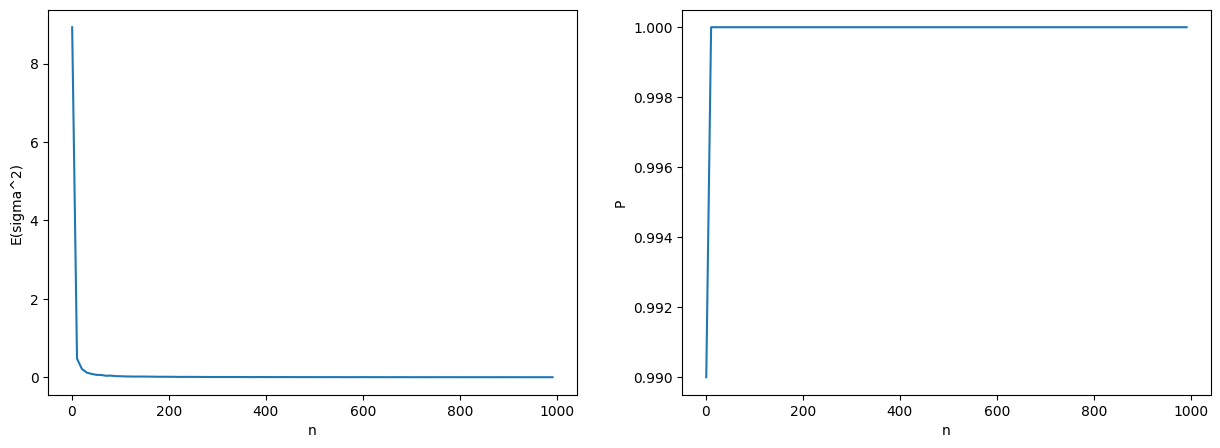

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plot1 = ax1.plot(list(range(1, N, 10)), sigma_sq_expects_bad)
ax1.set_xlabel('n')
ax1.set_ylabel('E(sigma^2)')
ax2.plot(list(range(1, N, 10)), P_sigma_bad)
ax2.set_xlabel('n')
ax2.set_ylabel('P')
plt.show()

Как видно, математическое ожидание такой оценки дисперсии действительно стремится к нулю, а вероятность отклониться на величину, большую $\varepsilon$, стремится к единице при росте выборки, что и предсказывает наш небольшой мысленный эксперимент. Следовательно, данная оценка не является ни несмещённой, ни асимптотически несмещённой, ни состоятельной.

Теперь покажем, что если делать оценку по формуле:
$$\hat{\sigma}_n^2 = \frac{1}{2n} \sum_{i=1}^n (x_{2i} - x_{2i-1})^2$$
то такая оценка будет вполне себе хорошей. А именно - она будет несмещённой, асимптотически несмещённой и состоятельной.
Мы можем увидеть это из такого же моделирования, как выше, только будем вычислять оценку по формуле, указанной выше (без составления вариационного ряда).

In [35]:
N = 50000  # максимальный размер выборки
M = 50  # параметр, задающий количество генерируемых выборок одинаковой длины n
mu = 0.0  # математическое ожидание
sigma = 3.0  # среднеквадратическое отклонение
sigma_sq = sigma ** 2  # дисперсия
eps = 0.1  # epsilon из сходимости по вероятности

In [36]:
P_sigma_good = np.array([])
sigma_sq_expects_good = np.array([])  # массив, который будет хранить математические ожидания оценок дисперсии при различных размерах выборки
for n in range(1, N, 10):  # цикл по размеру выборки
    sigma_sq_eval_list_good = np.array([])  # массив оценок дисперсии при данном размере выборки
    for i in range(M):
        gauss = np.random.normal(mu, sigma, size=2*n)  # генерация выборки из нормального распределения с заданными параметрами
        sigma_sq_eval_list_good = np.append(sigma_sq_eval_list_good, np.sum((gauss[1::2] - gauss[::2]) ** 2) / (2 * n))  # оценка дисперсии
    sigma_sq_expects_good = np.append(sigma_sq_expects_good, np.mean(sigma_sq_eval_list_good))  # вычисление мат. ожидания оценки дисперсии
    P_sigma_good = np.append(P_sigma_good, len(sigma_sq_eval_list_good[np.abs(sigma_sq_eval_list_good - sigma_sq) >= eps]) / M)

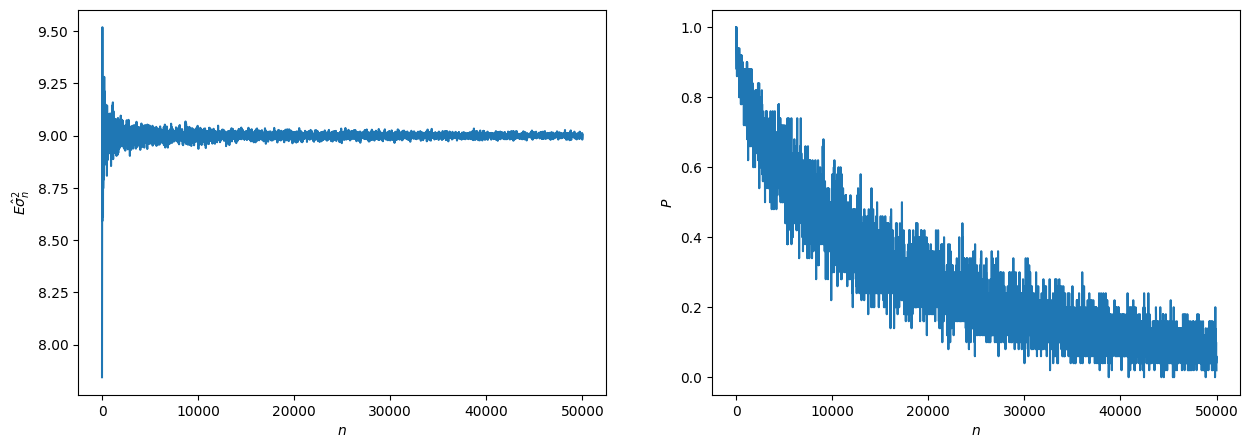

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plot1 = ax1.plot(list(range(1, N, 10)), sigma_sq_expects_good)
ax1.set_xlabel('$n$')
ax1.set_ylabel('$E\hat{\sigma}_n^2$')
ax2.plot(list(range(1, N, 10)), P_sigma_good)
ax2.set_xlabel('$n$')
ax2.set_ylabel('$P$')
plt.show()

Отсюда напрямую видно, что оценка является несмещённой, асимптотически несмещённой и состоятельной (хотя, конечно, вероятность стремится к нулю не слишком уж быстро).
Несмещённость такой оценки можно показать непосредственно. Пусть у нас выборка размера $2n$ с математическим ожиданием $m$ и дисперсией $\sigma^2$. Имеем:
$$\hat{\sigma}_n^2 = \frac{1}{2n} \sum_{i=1}^n (x_{2i} - x_{2i-1})^2 = \frac{1}{2n} \sum_{i=1}^n (x_{2i} - m)^2 - 2(x_{2i} - m)(x_{2i-1} - m) + (x_{2i-1} - m)^2$$
$$\mathbb{E}\hat{\sigma}_n^2 = \frac{1}{2n} \sum_{i=1}^n \mathbb{E}(x_{2i} - m)^2 - 2\mathbb{E}((x_{2i} - m)(x_{2i-1} - m)) + \mathbb{E}(x_{2i-1} - m)^2 = $$
$$= \frac{1}{2n} \sum_{i=1}^n \sigma^2 - 2(\mathbb{E}(x_{2i}x_{2i-1}) - \mathbb{E}x_{2i}m - \mathbb{E}x_{2i-1}m + \mathbb{E}m^2) + \sigma^2 = \frac{1}{2n} \sum_{i=1}^n 2\sigma^2 - 2(m^2 - m^2 - m^2 + m^2) = \sigma^2$$
Видим, что такая исправленная оценка действительно не смещена, а, следовательно, и асимптотически не смещена.

Состоятельность такой оценки показать сложнее. Думаю, это можно сделать, используя тот факт, что сходимость в среднеквадратическом влечёт сходимость по вероятности. Среднеквадратическое отклонение же раскладывается на дисперсию оценки и смещение (которое в нашем случае будет равно нулю вследствие несмещённости). Таким образом, нужно будет показать, что дисперсия оценки стремится к нулю.
Это, кажется, можно сделать, заметив, что так как в сумме в формуле для оценки все слагаемые будут содержать случайные величины с разными индексами, то все слагаемые будут независимы между собой, и поэтому дисперсия такой суммы будет равна сумме дисперсий.
Останется рассчитать $D(\xi - \eta)^2$, где $\xi, \eta$ - независимые, одинаково распределённые случайные величины с конечным вторым моментом. Мне думается, что такую дисперсию можно рассчитать и выразить её через первые и вторые моменты случайных величин $\xi, \eta$, и затем заметить, что итоговая сумма таких дисперсий, делённая на размер выборки $n$, будет стремиться к нулю.